In [1]:
# 安装pyecharts
# !pip install pyecharts==0.1.9.4 -i "https://mirrors.aliyun.com/pypi/simple/"

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [3]:
#引入出具分析库

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time

In [3]:
# # 解压
# # 下载并解压核心代码及数据文件
# print("开始解压")
# # 压缩包名字需要带后缀，如：data.zip
# !unzip -o -q UserBehavior.csv.zip
# print("解压成功，可以开始学习啦～")
# print("解压好的数据会在 download目录下")

### 数据预处理

本项目的数据集为天池阿里公开数据集User behavior data from Taobao for recommendation。实验过程中由于数据量大，运行速度慢，只取前1000000行的用户行为数据进行研究。

In [4]:
# 数据读取

file_path =r"./data_1000000.csv"
data=pd.read_csv(file_path,header=None,index_col=None)
data.columns = ['用户ID','商品ID','商品类目ID','行为类型','时间戳']
data.head()

,用户ID,商品ID,商品类目ID,行为类型,时间戳
0,0,1,2,3,4
1,1,2268318,2520377,pv,1511544070
2,1,2333346,2520771,pv,1511561733
3,1,2576651,149192,pv,1511572885
4,1,3830808,4181361,pv,1511593493


In [5]:
# 一、数据读取和数据清洗
# 1.检查空值 ---检查结果数据无空值
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000001 entries, 0 to 1000000
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   用户ID    1000001 non-null  int64 
 1   商品ID    1000001 non-null  int64 
 2   商品类目ID  1000001 non-null  int64 
 3   行为类型    1000001 non-null  object
 4   时间戳     1000001 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 38.1+ MB


用户ID      0
商品ID      0
商品类目ID    0
行为类型      0
时间戳       0
dtype: int64

In [6]:
# 2.检查异常值
# 1）Timestamp存在负值
print(data[data["时间戳"]<0])
data = data[data["时间戳"]>0]
# 2）Behavior_type存在异常值
print(data["行为类型"].value_counts())
data = data[data["行为类型"]!="3"]
# 3）检查异常处理结果
print(data[data["时间戳"]<0])
print(data["行为类型"].value_counts())

print(data.info())  
data.head()

Empty DataFrame
Columns: [用户ID, 商品ID, 商品类目ID, 行为类型, 时间戳]
Index: []
pv      896106
cart     55447
fav      28088
buy      20359
3            1
Name: 行为类型, dtype: int64
Empty DataFrame
Columns: [用户ID, 商品ID, 商品类目ID, 行为类型, 时间戳]
Index: []
pv      896106
cart     55447
fav      28088
buy      20359
Name: 行为类型, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 1 to 1000000
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   用户ID    1000000 non-null  int64 
 1   商品ID    1000000 non-null  int64 
 2   商品类目ID  1000000 non-null  int64 
 3   行为类型    1000000 non-null  object
 4   时间戳     1000000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 45.8+ MB
None


,用户ID,商品ID,商品类目ID,行为类型,时间戳
1,1,2268318,2520377,pv,1511544070
2,1,2333346,2520771,pv,1511561733
3,1,2576651,149192,pv,1511572885
4,1,3830808,4181361,pv,1511593493
5,1,4365585,2520377,pv,1511596146


In [7]:
# 3.时间戳转换时间单位
data.loc[:,'时间戳']=data['时间戳'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(x)))
data.loc[:,'日期']=data['时间戳'].apply(lambda x:x.split(' ')[0])
data.loc[:,'时间']=data['时间戳'].apply(lambda x:x.split(' ')[1])
# 只取2017年11月25日至2017年12月3日之间的数据进行研究
# print(data["Date"].value_counts())
cleaned_data=data[(data["日期"]>='2017-11-25')&(data["日期"]<='2017-12-03')]
print(cleaned_data["日期"].value_counts())

2017-12-02    137774
2017-12-03    136648
2017-12-01    109390
2017-11-26    106576
2017-11-30    105587
2017-11-25    104408
2017-11-29    102240
2017-11-28     99099
2017-11-27     97808
Name: 日期, dtype: int64


In [9]:
# 4.去除重复数据
cleaned_data[cleaned_data.duplicated()]
# print(cleaned_data.duplicated().value_counts())
# cleaned_data=cleaned_data.drop_duplicates(subset=['用户ID','商品ID','商品类目ID','行为类型','时间戳'],keep='first')
# print(cleaned_data.duplicated().value_counts())


,用户ID,商品ID,商品类目ID,行为类型,时间戳,日期,时间


In [10]:
# 5.预处理数据保存
# cleaned_data.to_csv(r'./cleaned_data.csv', encoding = 'utf-8', index = False)
# 第一次运行取消注释↑
print(cleaned_data.duplicated().value_counts())

False    999530
dtype: int64


### 数据分析

##### 读取数据

In [11]:
####
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
file_path =r"./cleaned_data.csv"
data=pd.read_csv(file_path)
data.head()

,用户ID,商品ID,商品类目ID,行为类型,时间戳,日期,时间
0,1,2268318,2520377,pv,2017-11-25 01:21:10,2017-11-25,01:21:10
1,1,2333346,2520771,pv,2017-11-25 06:15:33,2017-11-25,06:15:33
2,1,2576651,149192,pv,2017-11-25 09:21:25,2017-11-25,09:21:25
3,1,3830808,4181361,pv,2017-11-25 15:04:53,2017-11-25,15:04:53
4,1,4365585,2520377,pv,2017-11-25 15:49:06,2017-11-25,15:49:06


### 数据基本信息

本数据集包含了2017年11月25日至2017年12月3日之间，有行为的约一百万随机用户的所有行为（行为包括点击、购买、加购、喜欢）。数据集的组织形式和MovieLens-20M类似，即数据集的每一行表示一条用户行为，由用户ID、商品ID、商品类目ID、行为类型和时间戳组成，并以逗号分隔。

In [12]:
describe1=pd.DataFrame({"用户数量":len(set(list(data["用户ID"]))),"产品数量":len(set(list(data["商品ID"]))),"产品种类数量":len(set(list(data["商品类目ID"]))),"统计天数":len(set(list(data["日期"])))},index=['1'])
describe1

,用户数量,产品数量,产品种类数量,统计天数
1,9739,398971,5793,9


### 一、用户流量和购买时间情况分析

#### 1.用户行为统计表

In [38]:
describe3 = data.loc[:,["用户ID","行为类型"]]
ids = pd.DataFrame(np.zeros(len(set(list(data["用户ID"])))),index=set(list(data["用户ID"])))
pv_class=describe3[describe3["行为类型"]=="pv"].groupby("用户ID").count()
pv_class.columns  = ["点击"]
buy_class=describe3[describe3["行为类型"]=="buy"].groupby("用户ID").count()
buy_class.columns  = ["购买"]
fav_class=describe3[describe3["行为类型"]=="fav"].groupby("用户ID").count()
fav_class.columns  = ["加购"]
cart_class=describe3[describe3["行为类型"]=="cart"].groupby("用户ID").count()
cart_class.columns  = ["收藏"]
user_behavior_counts=ids.join(pv_class).join(fav_class).join(cart_class).join(buy_class).iloc[:,1:]
user_behavior_counts = user_behavior_counts.fillna(0)
user_behavior_counts.head(5)

,点击,加购,收藏,购买
1,55.0,0.0,0.0,0.0
1015809,116.0,0.0,11.0,3.0
1015810,48.0,0.0,0.0,0.0
1015811,122.0,9.0,0.0,2.0
1015814,217.0,2.0,11.0,3.0


#### 2.总访问量成交量时间变化分析（天）

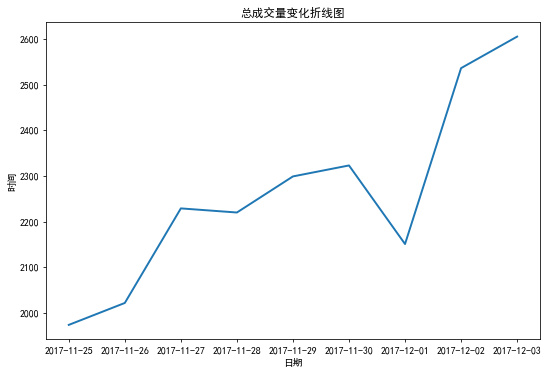

In [43]:
from matplotlib import font_manager
data["行为类型"].value_counts()
# pv      895636
# cart     55447
# fav      28088
# buy      20359

plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #正常显示负号

#访问量数据
data_pv = data[data["行为类型"]=="pv"][["行为类型","日期"]]
data_pv_date=data_pv.groupby(by="日期").count()
# print("访问量数据(单/天)","\n",data_pv_date)
#成交量数据
data_buy = data[data["行为类型"]=="buy"][["行为类型","日期"]]
data_buy_date=data_buy.groupby(by="日期").count()
# print("成交量数据(单/天)","\n",data_buy_date)
#绘图
my_font = font_manager.FontProperties(fname='C:\Windows\Fonts\Deng.ttf')
plt.figure(figsize=(20,6),dpi =70)
plt.title("总访问量、成交量变化折线图")
# ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
# plt.sca(ax1)
# plt.plot(data_pv_date.index,data_pv_date.values,label="pv",color="green",linewidth=2)
# plt.title("总访问量变化折线图")
# plt.xlabel("日期")
# plt.ylabel("时间")

plt.sca(ax2)
plt.title("总成交量变化折线图")

plt.plot(data_buy_date.index,data_buy_date.values,label="buy",linewidth=2)
plt.xlabel("日期")
plt.ylabel("时间")
plt.show()

由总访问量、成交量时间变化分析知，从17年11月25日至17年12月1日访问量和成交量存在小幅波动，2017年12月2日访问量和成交量均出现大幅上升，2日、3日两天保持高访问量和高成交量。
此现象原因之一为12月2日和3日为周末，同时考虑2日3日可能存在某些促销活动，可结合实际业务情况进行具体分析。
（图中周五访问量有上升，但成交量出现下降，推测此现象可能与周末活动导致周五推迟成交有关。）

#### 3.总访问量成交量时间变化分析（小时）

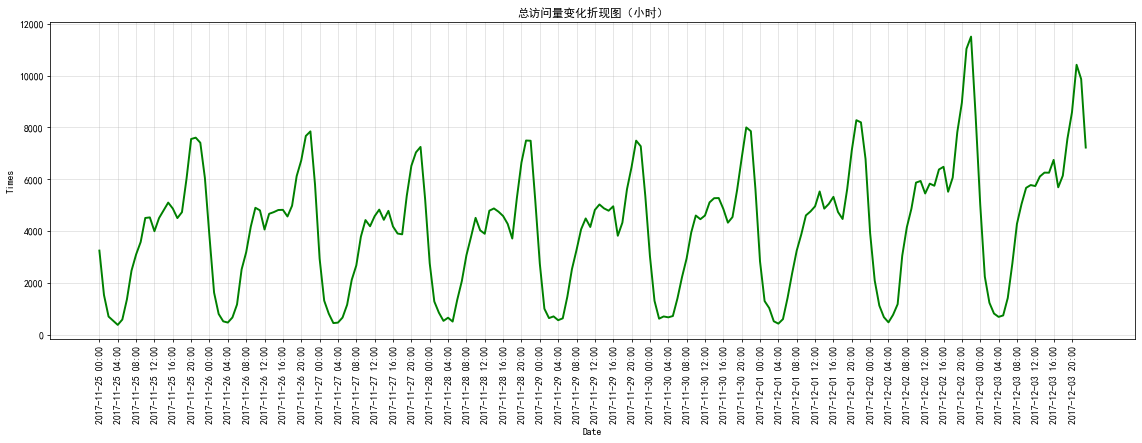

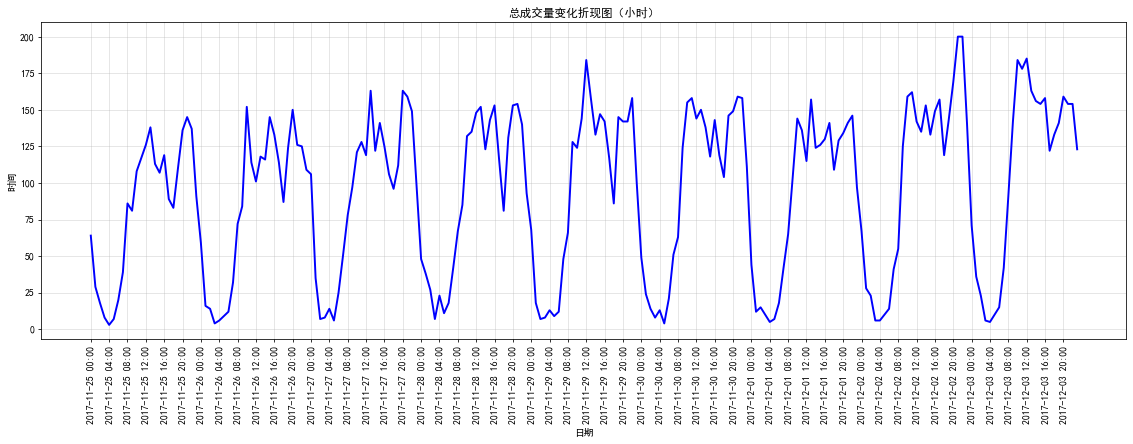

In [19]:
# 数据准备
data_pv_timestamp=data[data["行为类型"]=="pv"][["行为类型","时间戳"]]
data_pv_timestamp["时间戳"] = pd.to_datetime(data_pv_timestamp["时间戳"])

data_pv_timestamp=data_pv_timestamp.set_index("时间戳")
data_pv_timestamp=data_pv_timestamp.resample("H").count()["行为类型"]
data_pv_timestamp

data_buy_timestamp=data[data["行为类型"]=="buy"][["行为类型","时间戳"]]
data_buy_timestamp["时间戳"] = pd.to_datetime(data_buy_timestamp["时间戳"])

data_buy_timestamp=data_buy_timestamp.set_index("时间戳")
data_buy_timestamp=data_buy_timestamp.resample("H").count()["行为类型"]
data_buy_timestamp

#绘图1
plt.figure(figsize=(20,6),dpi =70)
_x1= data_pv_timestamp.index
plt.plot(range(len(_x1)),data_pv_timestamp.values,label="浏览量",color="green",linewidth=2)
plt.title("总访问量变化折现图（小时）")

_x1 = [i.strftime("%Y-%m-%d %H:%M") for i in _x1]

plt.xticks(range(len(_x1))[::4],_x1[::4],rotation=90)

plt.xlabel("Date")
plt.ylabel("Times")
plt.grid(alpha=0.4)

#绘图2
plt.figure(figsize=(20,6),dpi =70)
_x2= data_buy_timestamp.index
plt.plot(range(len(_x2)),data_buy_timestamp.values,label="成交量",color="blue",linewidth=2)
plt.title("总成交量变化折现图（小时）")

_x2 = [i.strftime("%Y-%m-%d %H:%M") for i in _x2]

plt.xticks(range(len(_x2))[::4],_x2[::4],rotation=90)

plt.xlabel("日期")
plt.ylabel("时间")
plt.grid(alpha=0.4)


在以小时为单位的访问量成交量时间变化图中，访问量、成交量低谷均位于凌晨四点左右，在上午10点和下午两点左右出现小高峰，晚上八点至九点为一天中浏览和成交的最高峰。此规律反映出用户使用淘宝网站的行为习惯，用户活跃时间主要集中在晚上八九点，凌晨四点为用户最不活跃的时间段。

### 二、漏斗模型（echart）


In [30]:
#数据准备
behavior_data =data["行为类型"].value_counts()
# pv      17901927
# fav       575114
# cart     1107532
# buy       404625
dict_num = {'行为':behavior_data.index,'计数':behavior_data.values}
behavior_data = pd.DataFrame(dict_num)
behavior_data.loc[1,"行为"]="cart+fav"
behavior_data.loc[1,"计数"]+=behavior_data.loc[2,"计数"]

behavior_data=behavior_data.loc[[0,1,3],:]
behavior_data

,行为,计数
0,pv,895636
1,cart+fav,83535
3,buy,20359


In [31]:
#计算单一环节转化率/总体转化率
import numpy as np
temp1 = np.array(behavior_data['计数'][1:])
temp2 = np.array(behavior_data['计数'][0:-1])
single_convs = temp1 / temp2
single_convs = list(single_convs)
single_convs.insert(0,1)
single_convs = [round(x,4) for x in single_convs]  # 利用round函数将转化率保留四位小数
behavior_data['单一环节转化率'] = single_convs
 
temp3 = np.array(behavior_data['计数'])
temp4= np.ones(len(behavior_data['计数'])) * behavior_data['计数'][0]
total_convs = (temp3 / temp4).tolist()
total_convs = [round(x,4) for x in total_convs]
behavior_data['总体转化率'] = total_convs

behavior_data

,行为,计数,单一环节转化率,总体转化率
0,pv,895636,1.0000,1.0000
1,cart+fav,83535,0.0933,0.0933
3,buy,20359,0.2437,0.0227


In [39]:
from pyecharts import Funnel


attrs = behavior_data['行为'].tolist()
attr_value = (np.array(behavior_data['总体转化率'])* 100).tolist()



funnel2 = Funnel("总体转化漏斗图",width=800, height=400, title_pos='center')
 
funnel2.add(name="商品交易环节",        # 指定图例名称
            attr=attrs,                 # 指定属性名称
            value = attr_value,         # 指定属性所对应的值
            is_label_show=True,         # 指定标签是否显示
            label_formatter='{b}{c}%',  # 指定标签显示的格式
            label_pos="outside",        # 指定标签的位置
            is_legend_show=False)       # 指定图例不显示图例
 
funnel2.render("1.html")
#在网页里下载图片存为png


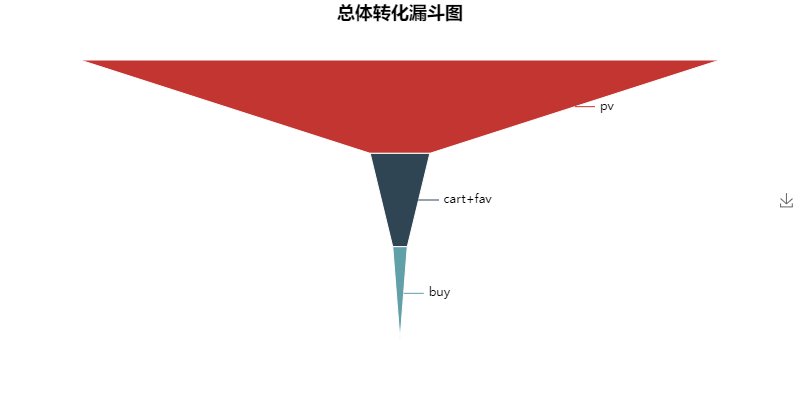

In [50]:
%matplotlib inline
from IPython.display import Image as IMG

display(IMG("总体转化漏斗图.png"))

### 三、用户特征分析

#### 1.基于购买率分析

#### 2.RMF 分析
RFM模型即"R"——Recency（最近一次消费时间）、"F"——Frequency（一段时间内消费频次）、"M"——Monetary（一段时间内消费总额）。这三个指标可以将我们的用户划分成不同的等级和层次，目的是为了衡量他们的用户价值，从而能够更准确地将成本和精力花在更精确的用户层次身上。这里没有关于金额的数据，因此只进行RF分析


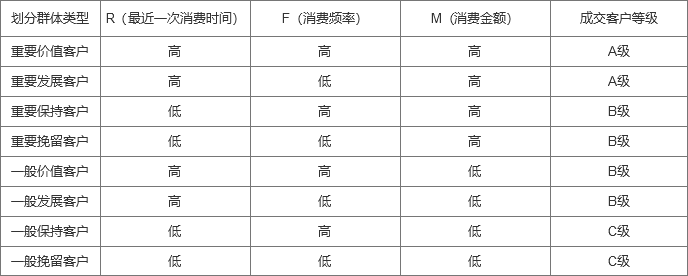

In [2]:
from IPython.display import Image as IMG

display(IMG("RMF.png"))

In [20]:
buy_data = data[data["行为类型"]=="buy"]

# diffdate=pd.DataFrame(np.
# buy_data["Datediff"]=[pd.to_datetime('2017-12-04')-pd.to_datetime(buy_data['Date'])]
buy_data
series_r=pd.to_datetime('2017-12-04')-pd.to_datetime(buy_data['日期'])

series_r1 = {'Recency':series_r.values}
series_r1 = pd.DataFrame(series_r1,index =series_r.index )

R_data = buy_data.join(series_r1)


series_r2 = R_data.groupby(by = "用户ID").count()["行为类型"]

series_r2_dic = {'Frequence':series_r2.values,"用户ID":series_r2.index}
F_data = pd.DataFrame(series_r2_dic)
RF_data = R_data.merge(F_data,on="用户ID",how="left") 
RF_data.head()

,用户ID,商品ID,商品类目ID,行为类型,时间戳,日期,时间,Recency,Frequence
0,100,1603476,2951233,buy,2017-11-25 11:18:28,2017-11-25,11:18:28,9 days,8
1,100,2971043,4869428,buy,2017-11-25 21:45:49,2017-11-25,21:45:49,9 days,8
2,100,598929,2429887,buy,2017-11-27 13:10:58,2017-11-27,13:10:58,7 days,8
3,100,1046201,3002561,buy,2017-11-27 15:21:38,2017-11-27,15:21:38,7 days,8
4,100,1606258,4098232,buy,2017-11-27 21:39:00,2017-11-27,21:39:00,7 days,8


In [21]:
RF_data["Recency"].dtype
RF_data["Recency"] = RF_data["Recency"]/np.timedelta64(1, 'D')
RF_data["Recency"]=RF_data["Recency"].astype("int64")
print(RF_data.quantile())
# RF_data.max()
RF_data["R"]=(RF_data["Recency"]).apply(lambda x: "高" if x <=5 else "低")
RF_data["F"]=(RF_data["Frequence"]).apply(lambda x: "高" if x >=4 else "低")



用户ID          122276.0
商品ID         2614868.0
商品类目ID       2640118.0
Recency            5.0
Frequence          4.0
Name: 0.5, dtype: float64


In [25]:
def rmf(r,f):
    if r=="高" and f=="高":
        return "价值客户"
    elif r=="低" and f=="高":
        return "保持客户"
    elif r=="高" and f=="低":
        return "发展客户"
    else:
        return "挽留客户"
    
RF_data['RMF']=RF_data.apply(lambda row: rmf(row['R'], row['F']), axis=1)
RF_data.head()

,用户ID,商品ID,商品类目ID,行为类型,时间戳,日期,时间,Recency,Frequence,R,F,RMF
0,100,1603476,2951233,buy,2017-11-25 11:18:28,2017-11-25,11:18:28,9,8,低,高,保持客户
1,100,2971043,4869428,buy,2017-11-25 21:45:49,2017-11-25,21:45:49,9,8,低,高,保持客户
2,100,598929,2429887,buy,2017-11-27 13:10:58,2017-11-27,13:10:58,7,8,低,高,保持客户
3,100,1046201,3002561,buy,2017-11-27 15:21:38,2017-11-27,15:21:38,7,8,低,高,保持客户
4,100,1606258,4098232,buy,2017-11-27 21:39:00,2017-11-27,21:39:00,7,8,低,高,保持客户


通过RMF模型，根据业务对最近一次消费时间按和消费频率数据进行对用户进行打分。根据高低值打分，将用户分为价值用户、发展用户、保持用户和挽留用户四种，并对不同类别的用户占比进行分析，从而实现差异化营销。 

价值客户    6766
发展客户    5148
保持客户    5062
挽留客户    3383
Name: RMF, dtype: int64


D:\Program Files\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Program Files\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Program Files\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23458 (\N{CJK UNIFIED IDEOGRAPH-5BA2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Program Files\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Program Files\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21457 (\N{CJK UNIFIED IDEOGRAPH-53D1}) missing from current font.
  fig.canvas.print_fig

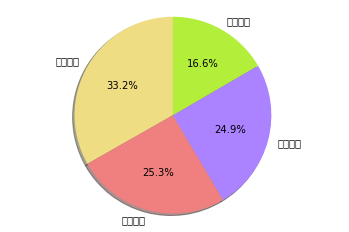

In [26]:
#RMF用户等级分析
from matplotlib import font_manager

rmf_data = RF_data['RMF'].value_counts()
print(rmf_data)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels =rmf_data.index
sizes = rmf_data.values #rmf_data.sum()
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
my_font = font_manager.FontProperties(fname='C:\Windows\Fonts\simhei.ttf')

fig1, ax1 = plt.subplots()
pie = ax1.pie(sizes,labels=labels, autopct='%1.1f%%',colors=["#EEDD82","#F08080","#AB82FF","#B3EE3A"],
        shadow=True, startangle=90)


# for font in pie[1]:
#     font.set_fontproperties(font_manager.FontProperties(
#             fname='C:\Windows\Fonts\Deng.ttf'))
    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**用户分类后，如何精细化运营呢？ 对用户分类以后要做什么呢？那就是针对每类用户如何制定运营策略，需要具体公司业务不同制定不一样的策略**

- 价值用户，RFM三个值都很高，要提供vip服务  
- 发展用户，消费频率低，但是其他两个值很高，就要想办法提高他的消费频率  
- 保持用户，最近消费距离现在时间较远，也就是F值低，但是消费频次和消费金额高。这种用户，是一段时间没来的忠实客户。应该提高复购率  
- 挽留客户，最近消费时间距离现在较远、消费频率低，但消费金额高。这种用户，即将流失，要调查清楚哪里出了问题，并想办法挽回。  

通过RFM分析方法来分析用户，对用户进行精细化运营。不断将用户转化为重要价值用户  

### 四、商品分析

In [67]:
item_data=data["商品ID"].value_counts()
dict_item = {'商品ID':item_data.index,'numbers':item_data.values}
item_data = pd.DataFrame(dict_item)
category_data = data["商品类目ID"].value_counts()
dict_category = {'商品类目ID':category_data.index,'numbers':category_data.values}
category_data = pd.DataFrame(dict_category)

In [68]:
item_data.head(5)

,商品ID,numbers
0,812879,304
1,138964,232
2,3845720,229
3,2331370,207
4,2032668,206


In [69]:
category_data.head(5)

,商品类目ID,numbers
0,4756105,51860
1,4145813,33829
2,2355072,32555
3,3607361,31217
4,982926,30791


以上商品销售情况及商品所属大类销售的受欢迎情况可快速得知.

# 数据挖掘

## KNN分类

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

**K值**
- K值（临近数，即在预测目标点时取几个临近的点来预测）的选择，会直接影响到预测结果。
- 当K值较小时，模型会较依赖于附近的邻居样本，具有较好敏感性，但是稳定性会较弱，容易导致过拟合。
- 当K值较大时，稳定性增加，但是敏感性会减弱，容易导致欠拟合。
- 通常情况下，可以通过交叉验证的方式，选择最合适的K值。

**K值的取值方式**
- K的取值尽量要取奇数，以保证在计算结果最后会产生一个较多的类别，如果取偶数可能会产生相等的情况，不利于预测。
- 常用的方法是从k=1开始，使用检验集估计分类器的误差率。重复该过程，每次K值增加1，即增加一个近邻，选取产生最小误差率的K。
- 一般k的取值不超过20，上限是n（n为样本总数）的开方，随着数据集的增大，K的值也要增大。

In [14]:
data_url = 'cleaned_data.csv'
df = pd.read_csv(data_url)
df.head(5)

,用户ID,商品ID,商品类目ID,行为类型,时间戳,日期,时间
0,1,2268318,2520377,pv,2017-11-25 01:21:10,2017-11-25,01:21:10
1,1,2333346,2520771,pv,2017-11-25 06:15:33,2017-11-25,06:15:33
2,1,2576651,149192,pv,2017-11-25 09:21:25,2017-11-25,09:21:25
3,1,3830808,4181361,pv,2017-11-25 15:04:53,2017-11-25,15:04:53
4,1,4365585,2520377,pv,2017-11-25 15:49:06,2017-11-25,15:49:06


## 数据挖掘

**特征工程**

In [30]:
#加载库
import pandas as pd
import numpy as np

In [31]:
# 数据读取
file_path =r"./data_1000000.csv"
df_left=pd.read_csv(file_path,index_col=None)
df_left.columns = ['用户ID','商品ID','商品类目ID','行为类型','时间戳']
df_left
df_right=pd.get_dummies(df_left['行为类型'])
df_right

,buy,cart,fav,pv
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
999995,0,1,0,0
999996,0,1,0,0
999997,0,1,0,0
999998,0,0,0,1


In [32]:
df_left=df_left.reset_index()
df_right=df_right.reset_index()

In [33]:
df = pd.concat([df_left,df_right],axis=1,join='outer')
df

,index,用户ID,商品ID,商品类目ID,行为类型,时间戳,index,buy,cart,fav,pv
0,0,1,2268318,2520377,pv,1511544070,0,0,0,0,1
1,1,1,2333346,2520771,pv,1511561733,1,0,0,0,1
2,2,1,2576651,149192,pv,1511572885,2,0,0,0,1
3,3,1,3830808,4181361,pv,1511593493,3,0,0,0,1
4,4,1,4365585,2520377,pv,1511596146,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,128600,1729257,2640118,cart,1511826553,999995,0,1,0,0
999996,999996,128600,4935668,2640118,cart,1511826588,999996,0,1,0,0
999997,999997,128600,3175221,2640118,cart,1511826676,999997,0,1,0,0
999998,999998,128600,3840425,2640118,pv,1511826695,999998,0,0,0,1


In [2]:
grouped=df.groupby(['用户ID','商品ID'])
a=grouped.agg({'pv': [np.sum], 'fav': [np.sum], 'cart': [np.sum], 'buy': [np.sum]})
a.columns = ['点击','收藏','加购','购买']
a
# a.to_csv('商品购物行为表.csv')
# print([column for column in a])
# a[a[('buy', 'sum')]>0]

NameError: name 'df' is not defined

In [43]:
grouped2=df.groupby('商品ID')
influence=grouped2.agg({'pv': [np.sum], 'fav': [np.sum], 'cart': [np.sum], 'buy': [np.sum]})
influence.columns = ['点击量','收藏量','加购量','购买量']
influence

# a.to_csv('商品购物行为表.csv')
# print([column for column in a])
influence['点击量'] = influence['点击量'].astype(int)
influence[influence['购买量']>0]

,点击量,收藏量,加购量,购买量
商品ID,,,,
81,13,0,1,1
255,8,0,0,1
322,8,1,0,3
1006,1,0,0,1
1138,7,0,0,2
...,...,...,...,...
5161757,3,0,0,1
5162067,3,0,1,1
5162667,5,0,0,1
